In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
import string
import re

In [3]:
vecdir = "/Users/choney1/Dropbox/Reference/WordVectors/"
# vecfile = "wiki-news-300d-1M-subword.vec"
# vecfile = "wiki-news-300d-small.vec"
vecfile = "wiki-news-300d-5000words.vec"

corpusdir = "/Users/choney1/Dropbox/Projects/2017/NarrativeTimescales/TextCorpora/"
corpusfile = "jane_eyre.txt"


In [4]:
vecs = open(vecdir+vecfile)
dimvec = 300 #dimension of vector embedding
iline = 0    #line counter
nvecs = 5000  #maximum number of vectors to read from file

wordvecs = np.zeros((dimvec, nvecs))   #matrix of word embedding vectors
allwords = []   #will contain a list of all the words
vecdict = {}        #will contain a dictionary pointing from words to vectors


FileNotFoundError: [Errno 2] No such file or directory: '/Users/choney1/Dropbox/Reference/WordVectors/wiki-news-300d-5000words.vec'

In [185]:

for line in vecs:
    if iline >= (nvecs-1): break
    
    thisline = line.split()
    
    currentword = thisline[0]
    currentvec = np.array(thisline[1:])
    allwords.append(currentword)
    vecdict[currentword] = currentvec

#     print(iline)
#     print(np.array(thisline[1:]))

    wordvecs[:,iline] = currentvec

    iline = iline + 1
    

vecs.close()

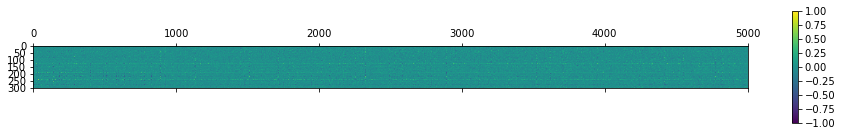

In [239]:
plt.matshow(wordvecs, vmin=-1, vmax=1)
plt.rcParams["figure.figsize"] = (10,10)
plt.colorbar()

In [132]:
whos

Variable     Type             Data/Info
---------------------------------------
corpusdir    str              /Users/choney1/Dropbox/Pr<...>iveTimescales/TextCorpora
corpusfile   str              jane_eyre.txt
dimvec       int              300
iline        int              4999
line         str              intelligent -0.03776 -0.0<...>563 0.0072339 0.012932 \n
maxlines     int              20
np           module           <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
nvecs        int              5000
plt          module           <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
sci          module           <module 'scipy' from '/Us<...>kages/scipy/__init__.py'>
thisline     list             n=301
tmp          str              1000000 300\n
tmp1         str              1000000 300\n
tmp2         str              , 0.020344 -0.012294 -0.0<...>543 0.030603 0.0047477 \n
vecdir       str              /Users/choney1/Dropbox/Reference/WordVectors/
vecfile      str       

In [246]:
corpuslines = open(corpusdir+corpusfile)


icorpusline = 0
maxcorplines = 1000

numwordsstored = 0
numwordstested = 0

maxwordsstored = 5000

regex = re.compile('[%s]' % re.escape(string.punctuation))

corpusvecs = []

for corpusline in corpuslines:

    if icorpusline >= (maxcorplines-1): break
    if numwordsstored >= (maxwordsstored-1): break
    
    thisline = regex.sub('', corpusline.rstrip('\n')).split(" ")
    
    for word in thisline:
        numwordstested = numwordstested + 1
        newvec = vecdict.get(word, None)
        if newvec is not None:
                corpusvecs.append(newvec)
                numwordsstored = numwordsstored + 1

    icorpusline = icorpusline + 1

print("Numver of words checked: " + str(numwordstested))
print("Numver of words found in dictionary: "+ str(numwordsstored))
corpuslines.close()

Numver of words checked: 6861
Numver of words found in dictionary: 5011


In [247]:
corpusarray = np.array(corpusvecs, dtype='float').T

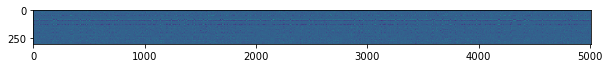

In [248]:
plt.imshow(corpusarray)

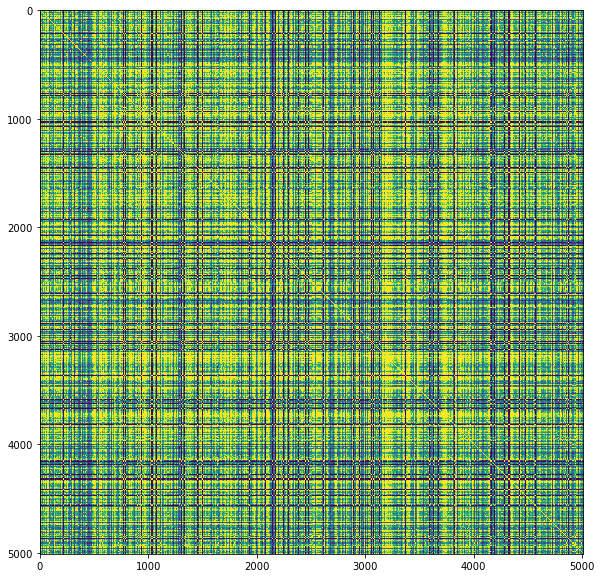

In [250]:

# plt.imshow(np.dot(corpusarray,corpusarray.T))

wordvec_corr = np.dot(corpusarray.T,corpusarray)

plt.imshow(wordvec_corr, vmin=0.1, vmax=0.75)
plt.rcParams["figure.figsize"] = (10,10)


In [ ]:
rank-1

